<a href="https://colab.research.google.com/github/vishenka-git/nlp_sentiment_analysis/blob/master/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#!ls "/content/gdrive/My Drive"

In [2]:
import pandas as pd
reviews = pd.read_excel('/content/gdrive/My Drive/reviews.xlsx')

print(reviews)

        target  ...                                        review_text
0         good  ...  Настоящее кино. Наше кино. Прекрасная работа с...
1         good  ...  Мало того, что сериал «Империя под ударом» (12...
2         good  ...  Период от реформ Александра Освободителя до пе...
3         good  ...  Атмосферный сериал о Российской Империи начала...
4      neutral  ...  Самая большая беда современного общества это т...
...        ...  ...                                                ...
80279     good  ...  О фильме узнал совершенно случайно, увидел пос...
80280     good  ...  Обожаю фильмы с Дэнни Гловером. Его последнее ...
80281     good  ...  Реслинг борьбе рознь!\n\r\nТак уж вышло, что в...
80282     good  ...  Удивительно, но даже такой рестлер-актер, как ...
80283     good  ...  Буду честным, я ожидал что весь фильм я буду с...

[80284 rows x 6 columns]


In [3]:
reviews.columns

Index(['target', 'movie_link', 'author_id', 'author_name', 'review_subtitle',
       'review_text'],
      dtype='object')

In [4]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000

In [6]:
reviews.describe()

,target,movie_link,author_id,author_name,review_subtitle,review_text
count,80284,80284,80284,80282,60200,80282
unique,3,2160,22278,23496,46180,63433
top,good,/film/matrica-revolyuciya-2003-316/,0,Tristo,Шедевр,"Посмотреть этот фильм я решила из-за фотографии. Недели 2 назад на просторах Интернета я нашла кадр, где Джереми Реннер ну очень сексуально стреляет из сверхточной винтовки. А как только я увидела актерский состав, поняла  этот фильм надо точно посмотреть!\n\r\nВ принципе, сюжет далеко не новый. Полицейских за плохо выполненное задание отправляют в самый скучный департамент, где им дает второй шанс какая-нибудь легендарная личность. Они тренируются в спецотряде и все их навыки воплощаются в какой-нибудь особой миссии. Нигде не надо думать, просто смотрим и наслаждаемся.\n\r\nКак я уже говорила, актерский состав  просто великолепен! Колин Фаррелл  главный герой, хорошо натренированный коп, котрому и дается этот второй шанс  сыграл неплохо, особенно хорошо во второй части фильма. Сэмюэль Л. Джексон  один из моих любимых актеров  играет лидера спецотряда. Ему очень хорошо удаются роли наставников и лидеров  достаточно посмотреть Звездные войны, Мстителей и Криминальное чтиво. Н..."
freq,60189,150,5243,702,25,4


In [7]:
text = reviews['review_text']

In [8]:
text[0]

'Настоящее кино. Наше кино. Прекрасная работа сценариста, режиссёра, операторов. Профессиональный монтаж, музыкальное сопровождение. Превосходная игра актёров.\n\r\nРабота с\xa0таким тонким материалом, как\xa0история, требует мастерства и\xa0подлинного таланта. Это\xa0не фантазия и\xa0нахлынувшее воображение, а\xa0факты, подлинная история, с\xa0которой нельзя не\xa0считаться. Прочувственно то\xa0неспокойное время. Фильм не\xa0отвергает прошлое, как\xa0делают в\xa0некоторых картин, не\xa0старается выкрасить в\xa0чёрные цвета действующих лиц. \n\r\nФильм всего лишь повествует о\xa0людях, об\xa0идеях, о\xa0любви. Повествует о\xa0стране, которая очень сильно изменилась, но\xa0по-прежнему существует. Хочется вериться, что\xa0никакие идеи и\xa0люди, которые борются за\xa0эти идеи, не\xa0пойдут по\xa0проторённой дороге. Уроки должны быть выучены, особенно уроки истории.'

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from textblob import TextBlob
# from textblob import Word
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
stoplist = stopwords.words('russian')
stopset = set(stopwords.words('russian'))
print(stoplist)
print(stopset)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [13]:
from string import punctuation
punctlist = [punctuation]
print(punctlist)

['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']


In [ ]:
# noise = stopwords.words('russian') + list(punctuation)

In [14]:
#sentiment count
reviews['target'].value_counts()

good       60189
neutral    12814
bad         7281
Name: target, dtype: int64

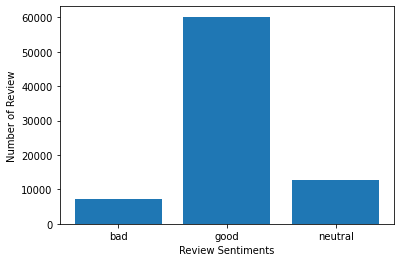

In [15]:
Sentiment_count=reviews.groupby('target').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['review_text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [16]:
reviews['review_len'] = reviews['review_text'].dropna().astype(str).apply(len)
reviews['word_count'] = reviews['review_text'].dropna().apply(lambda x: len(str(x).split()))

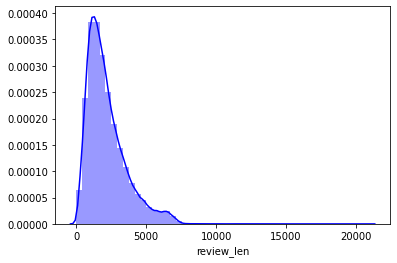

In [18]:
import seaborn as sns
sns.distplot(reviews['review_len'], color = 'blue')

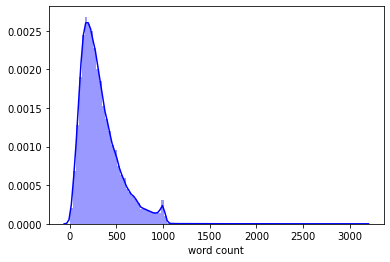

In [19]:
import seaborn as sns
sns.distplot(reviews['word_count'],
    bins=100,
    axlabel ='word count',
    color ='blue',
    label ='Review Text Word Count Distribution'
    )

In [20]:
reviews.describe()

,review_len,word_count
count,80282.000000,80282.000000
mean,2176.935054,325.375240
std,1410.811082,208.397739
min,1.000000,1.000000
25%,1160.000000,175.000000
50%,1830.000000,275.000000
75%,2834.000000,423.000000
max,20924.000000,3139.000000


In [21]:
reviews.groupby('target').count()

,movie_link,author_id,author_name,review_subtitle,review_text,review_len,word_count
target,,,,,,,
bad,7281,7281,7281,5475,7281,7281,7281
good,60189,60189,60187,46500,60187,60187,60187
neutral,12814,12814,12814,8225,12814,12814,12814


In [23]:
review_list = text.to_list()

In [24]:
import re

def preprocess_text(text):
    text = str(text).lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
    text = re.sub('@[^\s]+', 'USER', text)
    text = re.sub('[^a-zA-Zа-яА-Я0-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


data = [preprocess_text(t) for t in review_list]

In [25]:
type(data[0])

str

In [26]:
data[:5]

['настоящее кино наше кино прекрасная работа сценариста режиссера операторов профессиональный монтаж музыкальное сопровождение превосходная игра актеров работа с таким тонким материалом как история требует мастерства и подлинного таланта это не фантазия и нахлынувшее воображение а факты подлинная история с которой нельзя не считаться прочувственно то неспокойное время фильм не отвергает прошлое как делают в некоторых картин не старается выкрасить в черные цвета действующих лиц фильм всего лишь повествует о людях об идеях о любви повествует о стране которая очень сильно изменилась но по прежнему существует хочется вериться что никакие идеи и люди которые борются за эти идеи не пойдут по проторенной дороге уроки должны быть выучены особенно уроки истории',
 'мало того что сериал империя под ударом 12 серий по 45 50 мин по делу на серию сам по себе на удивление хорош и серьезен особенно памятуя то непростое время смены столетий и власти в россии ушел ельцин пришел путин уходили бандитские

In [27]:
# def convertlist(lst): 
#     return [[el] for el in lst] 

# data_sent = convertlist(data)
# data_sent[:10]

In [31]:
# data_token = []
# for sent in data_sent:
#   for s in sent:
#     data_token.append(s.split())

In [32]:
# data_token_clean = [[word for word in sub if word not in stopset] for sub in data_token]

In [29]:
data_token = []
for i in data:
  data_token.append(i.split())

print(data_token[0])

['настоящее', 'кино', 'наше', 'кино', 'прекрасная', 'работа', 'сценариста', 'режиссера', 'операторов', 'профессиональный', 'монтаж', 'музыкальное', 'сопровождение', 'превосходная', 'игра', 'актеров', 'работа', 'с', 'таким', 'тонким', 'материалом', 'как', 'история', 'требует', 'мастерства', 'и', 'подлинного', 'таланта', 'это', 'не', 'фантазия', 'и', 'нахлынувшее', 'воображение', 'а', 'факты', 'подлинная', 'история', 'с', 'которой', 'нельзя', 'не', 'считаться', 'прочувственно', 'то', 'неспокойное', 'время', 'фильм', 'не', 'отвергает', 'прошлое', 'как', 'делают', 'в', 'некоторых', 'картин', 'не', 'старается', 'выкрасить', 'в', 'черные', 'цвета', 'действующих', 'лиц', 'фильм', 'всего', 'лишь', 'повествует', 'о', 'людях', 'об', 'идеях', 'о', 'любви', 'повествует', 'о', 'стране', 'которая', 'очень', 'сильно', 'изменилась', 'но', 'по', 'прежнему', 'существует', 'хочется', 'вериться', 'что', 'никакие', 'идеи', 'и', 'люди', 'которые', 'борются', 'за', 'эти', 'идеи', 'не', 'пойдут', 'по', 'прото

In [30]:
data_token_clean = [[word for word in sub if word not in stopset] for sub in data_token]
print(data_token_clean[0])

['настоящее', 'кино', 'наше', 'кино', 'прекрасная', 'работа', 'сценариста', 'режиссера', 'операторов', 'профессиональный', 'монтаж', 'музыкальное', 'сопровождение', 'превосходная', 'игра', 'актеров', 'работа', 'таким', 'тонким', 'материалом', 'история', 'требует', 'мастерства', 'подлинного', 'таланта', 'это', 'фантазия', 'нахлынувшее', 'воображение', 'факты', 'подлинная', 'история', 'которой', 'считаться', 'прочувственно', 'неспокойное', 'время', 'фильм', 'отвергает', 'прошлое', 'делают', 'некоторых', 'картин', 'старается', 'выкрасить', 'черные', 'цвета', 'действующих', 'лиц', 'фильм', 'лишь', 'повествует', 'людях', 'идеях', 'любви', 'повествует', 'стране', 'которая', 'очень', 'сильно', 'изменилась', 'прежнему', 'существует', 'хочется', 'вериться', 'никакие', 'идеи', 'люди', 'которые', 'борются', 'идеи', 'пойдут', 'проторенной', 'дороге', 'уроки', 'должны', 'выучены', 'особенно', 'уроки', 'истории']


In [31]:
data_clean = [' '.join(l) for l in data_token_clean]
data_clean[0]

'настоящее кино наше кино прекрасная работа сценариста режиссера операторов профессиональный монтаж музыкальное сопровождение превосходная игра актеров работа таким тонким материалом история требует мастерства подлинного таланта это фантазия нахлынувшее воображение факты подлинная история которой считаться прочувственно неспокойное время фильм отвергает прошлое делают некоторых картин старается выкрасить черные цвета действующих лиц фильм лишь повествует людях идеях любви повествует стране которая очень сильно изменилась прежнему существует хочется вериться никакие идеи люди которые борются идеи пойдут проторенной дороге уроки должны выучены особенно уроки истории'

In [32]:
len(data_clean)

80284

In [24]:
# pip install pymorphy2

In [21]:
# import pymorphy2
# from pymorphy2 import MorphAnalyzer
# morph = MorphAnalyzer()

In [42]:
# def ftoken_morphem(text):
#   morphem = []
#   for i in text:
#     morphem.append([morph.parse(t)[0].normal_form for t in i])
#   return morphem

In [33]:
import tqdm
from tqdm import tqdm

In [34]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
reviews['target'] = number.fit_transform(reviews['target'].astype('str'))

In [35]:
#sentiment count
reviews['target'].value_counts()

1    60189
2    12814
0     7281
Name: target, dtype: int64

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_clean)
y = reviews.iloc[:, 0].values

In [38]:
X.shape

(80284, 408917)

In [39]:
y.shape

(80284,)

In [40]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(64227, 408917) (16057, 408917) (64227,) (16057,)


In [50]:
# # Scaling the Train and Test feature set 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler(with_mean=False)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [65]:
%%time 

nb = MultinomialNB()
nb.fit(X_train, y_train)

CPU times: user 226 ms, sys: 1.75 ms, total: 228 ms
Wall time: 232 ms


In [67]:
%%time
from sklearn.model_selection import cross_val_score
results_nb_cv = cross_val_score(nb, X_train, y_train, cv=5)
print(results_nb_cv.mean())

0.7935603408512628
CPU times: user 1.38 s, sys: 16.3 ms, total: 1.39 s
Wall time: 1.4 s


In [68]:
nb.score(X_test, y_test)

0.8060036121317805

In [69]:
X_test_pred = nb.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[  632,   596,   228],
       [   80, 11559,   399],
       [  116,  1696,   751]])

In [70]:
print(classification_report(y_test, X_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.43      0.55      1456
           1       0.83      0.96      0.89     12038
           2       0.54      0.29      0.38      2563

    accuracy                           0.81     16057
   macro avg       0.71      0.56      0.61     16057
weighted avg       0.78      0.81      0.78     16057



In [80]:
import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

print(__doc__)

warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")
t0 = timeit.default_timer()

# We use SAGA solver
solver = 'saga'

# Turn down for faster run time
n_samples = 10000

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset reviews, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 2, 4]}}

for model in models:
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                penalty='l1',
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))


Automatically created module for IPython interactive environment
Dataset reviews, train_samples=64227, n_features=408917, n_classes=3
[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 4
Test accuracy for model ovr: 0.7952
% non-zero coefficients for model ovr, per class:
 [29.94103938 40.7290477  38.53398122]
Run time (4 epochs) for model ovr:512.21


In [58]:
# def predict_cat(d):
#     cat_names = {0 : 'bad', 1: 'good', 2: 'neutral'}
#     cod = nb.predict(cv.transform(d))
#     return cat_names[number.inverse_transform(cod)[0]]

In [59]:
# predict_cat(data_clean)

In [83]:
%%time 

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression(solver = 'saga', random_state = 42))

# Fit the classifier to the training data
clf.fit(X_train, y_train)

CPU times: user 1min 49s, sys: 31.6 ms, total: 1min 49s
Wall time: 1min 49s


In [84]:
X_test_clv_pred = clf.predict(X_test)
confusion_matrix(y_test, X_test_clv_pred)

array([[  927,   320,   209],
       [   63, 11614,   361],
       [  202,  1410,   951]])

In [88]:
X_test_lr_pred = lr.predict(X_test)
confusion_matrix(y_test, X_test_lr_pred)

array([[  595,   689,   172],
       [   59, 11768,   211],
       [  206,  1951,   406]])

In [85]:
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.840256585912686


In [89]:
print("Accuracy: {}".format(lr.score(X_test, y_test)))

Accuracy: 0.795229494924332


In [86]:
print(classification_report(y_test, X_test_clv_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1456
           1       0.87      0.96      0.92     12038
           2       0.63      0.37      0.47      2563

    accuracy                           0.84     16057
   macro avg       0.76      0.66      0.69     16057
weighted avg       0.82      0.84      0.82     16057



In [90]:
print(classification_report(y_test, X_test_lr_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1456
           1       0.82      0.98      0.89     12038
           2       0.51      0.16      0.24      2563

    accuracy                           0.80     16057
   macro avg       0.67      0.51      0.55     16057
weighted avg       0.76      0.80      0.75     16057



In [87]:
clf_pred = clf.predict(X)
np_pred = nb.predict(X)

models_correlation = np.corrcoef(clf_pred, np_pred)
models_correlation[0,1]

0.7064078926306627

In [93]:
lr_pred = lr.predict(X)
clf_pred = clf.predict(X)

models_correlation_2 = np.corrcoef(lr_pred, clf_pred)
models_correlation_2[0,1]

0.4371535934437078

Automatically created module for IPython interactive environment
Dataset reviews, train_samples=64227, n_features=408917, n_classes=3
[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 4
Test accuracy for model ovr: 0.7952
% non-zero coefficients for model ovr, per class:
 [29.94103938 40.7290477  38.53398122]
Run time (4 epochs) for model ovr:539.51
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 3
[model=Multinomial, solver=saga] Number of epochs: 7
Test accuracy for model multinomial: 0.8098
% non-zero coefficients for model multinomial, per class:
 [20.84603966 30.58102255 28.98118689]
Run time (7 epochs) for model multinomial:788.18
Example run in 2354.238 s


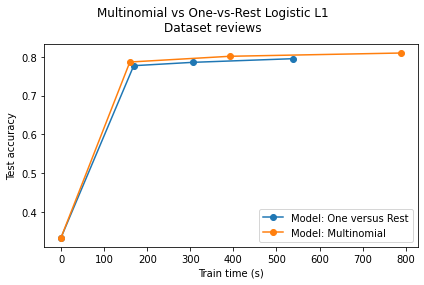

In [110]:
import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

print(__doc__)

warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")
t0 = timeit.default_timer()

# We use SAGA solver
solver = 'saga'

# Turn down for faster run time
n_samples = 10000


train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset reviews, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 2, 4]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                penalty='l1',
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % 'reviews')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print('Example run in %.3f s' % run_time)
plt.show()

In [49]:
y_pred

NameError: ignored

In [44]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
from tqdm import tqdm
for i in tqdm(range(5)):
  from sklearn.model_selection import GridSearchCV
  # Performing CV to tune parameters for best SVM fit 
  svm_model = GridSearchCV(SVC(), params_grid, cv=5)
  svm_model.fit(X_train_scaled, y_train)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score